In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
covid19 = pd.read_excel(r'C:\Users\elbakkali\Desktop\Datasets_Machine_Learning\covid19.xlsx')

In [236]:
covid19.head(5)

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

# Exploratory Data Analysis

## Objectif:

* Prédire si un cas est positif au covid-19 à partir des données cliniques.
* La performance d'un modèle est mesurée en général à l'aide du coeff de détermination (R²), celà dit dans notre cas, étant donné le déséquilibre de notre Dataset au niveau de la variable cible (seulement 10% de données sur les cas positifs), cette mesure peut être non fiable (cas ou le modèle prédit que des cas négatifs R²=90% tout de même), c'est pourquoi d'autres mesures peuvent être utilisées dans ce cas à savoir: La sensibilité / La précision / Le F1-score.
* Je souhaite obtenir une (sensibilité > 70%) et un (F1-score > 50%).

## Checklist de base:

### Analyse de forme:

* **Variable target**: SARS-Cov-2 exam result
* **Lignes et colonnes**: (5644, 110)
* **Types de variables**: float64  --  70  /// object  --   36 /// int64   --    4
* **Valeurs manquantes**: (5 variables sans valeurs manquantes) /// (Variables test viral --- 76% de v.m.) /// (Variables taux sanguins -- 89% v.m.)

### Analyse de fond:

* **Visualisation de la target**: 10% cas positifs , 90% cas négatifs
* **Signification des variables**: 
  * j'ai remarqué l'existence de 2 groupes de variables ayant le même pourcentage de v.m. , après une petite recherche sur le net, il s'est avéré que le premier groupe correspond aux tests viraux , le deuxième aux taux sanguins des patients.
  * Au niveau des taux sanguins, on remarque une différence en termes de Platelets / Leukocytes / Monocytes chez les patients atteint ou non du covid19 , peut être le virus engendre un changement à ce niveau, toutefois cette hypothèse reste à vérifier.
  * Au niveau des test viraux, on remarque tout d'abord la variable 'Parainfluenza 2' qui ne contient qu'une modalité et donc sera écartée de l'étude car elle n'apporte aucune information. Par ailleurs les virus 'Rhinovirus/Enterovirus et Inf A H1N1 2009' se démarquent par le fait qu'ils sont significativement présents chez les personnes atteintes du covid19.
  * La variable 'Patient age quantile' a clairement été transformée , ses valeurs sont comprises entre 0 -19 , celui qui a partagé le Dataset n'a pas donné des indications sur comment elle a été transformée, je suppose que chaque quantile représente 5 ans, donc 0 - 95 ans mais ça reste une hypothèse
* **Relation Variables/Target**:
    * **Age/target**: aucune observation
    * **blood/blood**: on remarque des variables qui sont fortement positivement corrélés d'un côté comme (Hematocrit, Hemoglobin, Red blood cells) , (Platelets, Leukocytes) , d'un autre côté des variables corrélées négativement comme (Mean corpuscular volume, Red blood cells) , (Hemoglobin, RDW) , (MCV, Red blood cells)
    * **viral/target**: Le Rhinovirus/Enterovirus se démarque a nouveau de par qu'il est plus répandue que les autres virus /// ParaInfluenza 2 a supprimer car 1 seule modalité
    * **viral/viral**: le Influenza Rapid Test (A et B) n'est pas fiable (surtout au niveau de la sensibilité) sur 19 testés positifs que 4 sont vraiment positifs.
    * **Est malade/blood**: les taux sanguins ne présentent aucune différence entre les personnes malades/non malades (des autres maladies que le COVID), à part les 'Lymphocytes' qui, à première vue montrent des différences.
    * **Hospitalisation/Blood**: Hematocrit, Hemoglobin, Basophils, Monocytes légèrement plus faibles chez les patients en soins intensifs/semi-intensifs /// Leukocytes légèrement plus élevées chez les patients en soins intensifs/semi-intensifs ////
    * **Hospitalisation/Virus**: Parmi 52 atteints du 'Respiratory Syntical Virus' 19 sont admis en soins //// parmis 382 atteints de Rhinovirus 32 sont admis en soins.
    
* **Valeurs manquantes**:
    * Viral (1354 valeurs non-vides avec un ratio covid  91/9 % )  
    * blood (602 valeurs non-vides avec un ratio covid 86/14 % )
    
* **Premières hypothèses**:
    * Les taux de Platelets/Leukocytes/Monocytes sont différents chez les personnes atteintes ou non du covid.
        * H0: Les taux moyens sont égaux entre les malades et les non malades. (à vérifier avec test de Student> test d'égalité (différence) des moyennes.
        * Hypothèse rejetée donc il y a des différences, en plus des 3 vars citées il y a le taux de 'Eosinophils' qui diffère chez les deux populations
    * Les taux de Lymphocites des personnes non-malades sont différents de ceux des malades.
        * H0: les taux moyens de Lymphocytes sont égaux entre les malades et les non malades.
        * Hypothèse acceptée donc il n'y a pas de différence, par contre il y a une différence au niveau de Eosinophils.

In [237]:
covid19.shape

(5644, 111)

In [238]:
covid19.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

In [239]:
pd.set_option('display.max_row', 110)
pd.set_option('display.max_column', 110)

In [240]:
((covid19.isna().sum())/covid19.shape[0]).sort_values(ascending=True)

Patient ID                                               0.0
Patient age quantile                                     0.0
SARS-Cov-2 exam result                                   0.0
Patient addmited to regular ward (1=yes, 0=no)           0.0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.0
                                                        ... 
Partial thromboplastin time (PTT)                        1.0
Urine - Sugar                                            1.0
Mycoplasma pneumoniae                                    1.0
D-Dimer                                                  1.0
Prothrombin time (PT), Activity                          1.0
Length: 111, dtype: float64

<AxesSubplot:>

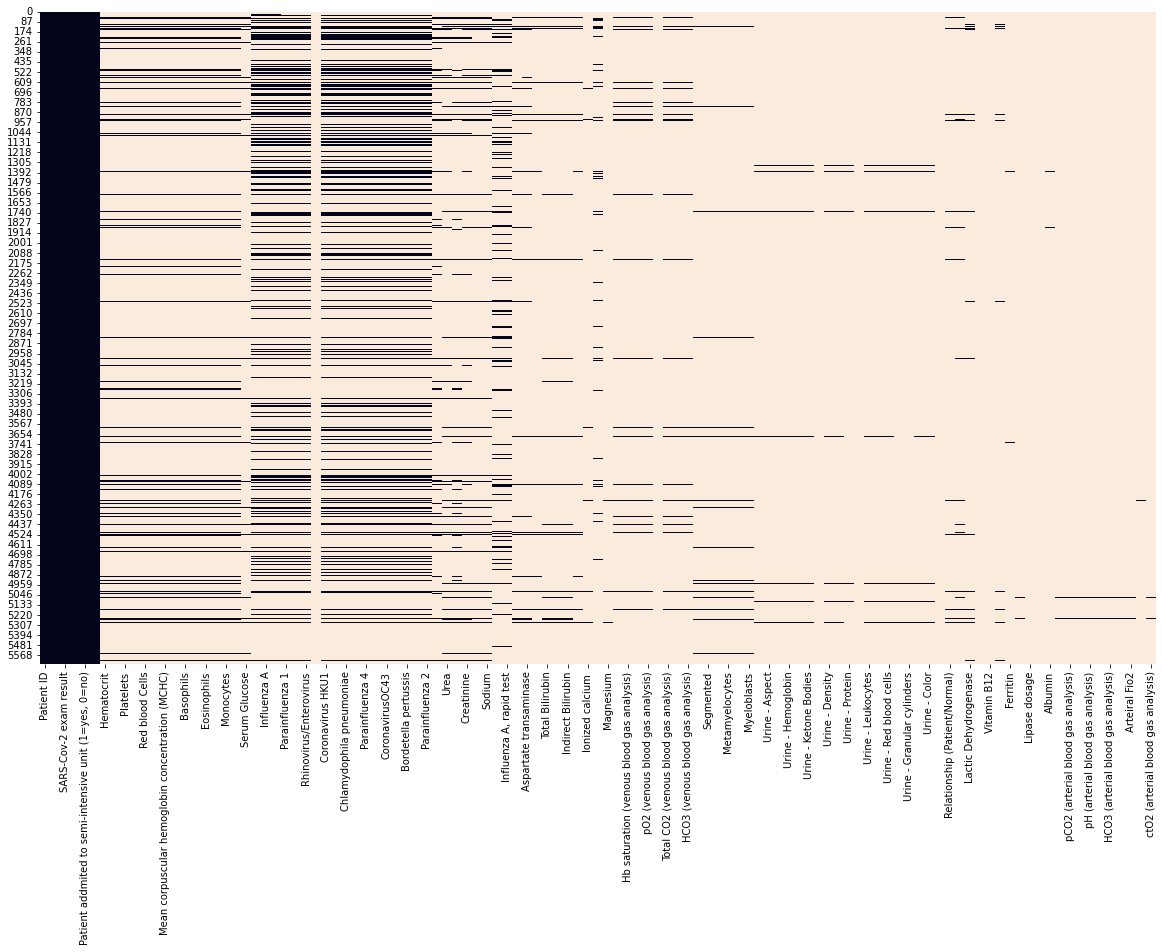

In [241]:
plt.figure(figsize=(20,12))
sns.heatmap(covid19.isna(), cbar=False)

# Visualisation de la target:

In [242]:
covid19['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

In [243]:
covid19.drop(covid19.columns[(covid19.isna().sum()/covid19.shape[0]) > 0.9], axis = 1, inplace=True)

In [244]:
missing_rate =(covid19.isna().sum()/covid19.shape[0])

In [245]:
covid19.shape

(5644, 39)

In [246]:
virus_test = covid19.columns[(missing_rate > 0.75) & (missing_rate < 0.86)]

In [247]:
virus_test

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

In [248]:
blood_test = covid19.columns[(missing_rate > 0.89) & (missing_rate < 0.90)]

In [249]:
blood_test

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

# Distribution blood:

C:\Users\elbakkali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\elbakkali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\elbakkali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

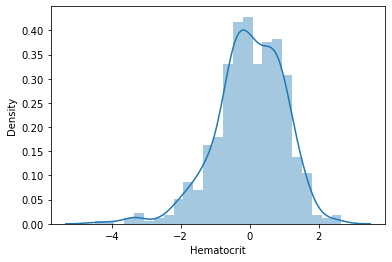

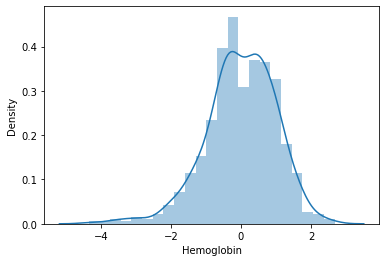

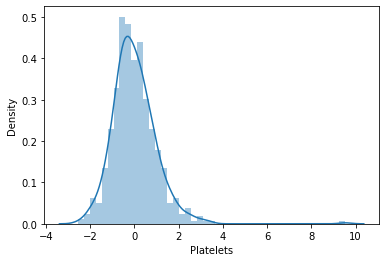

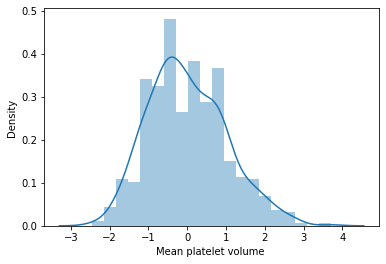

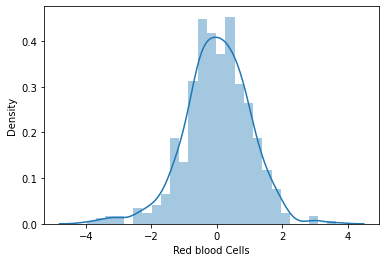

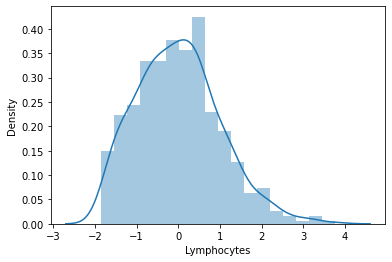

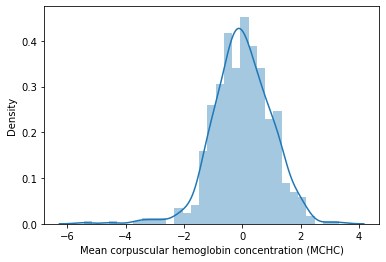

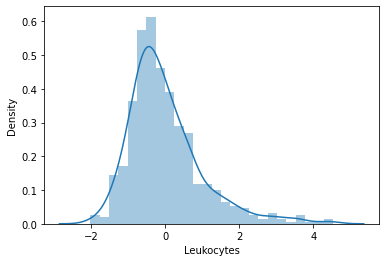

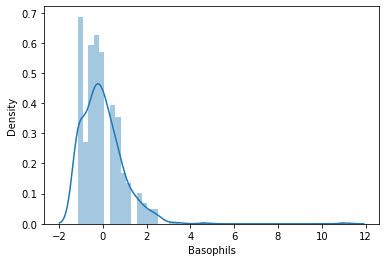

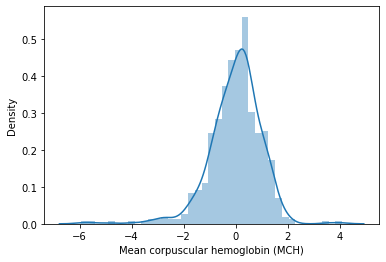

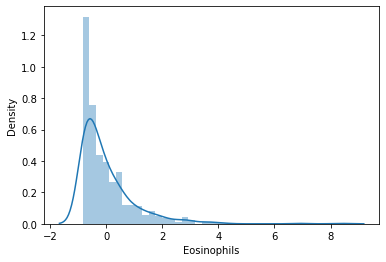

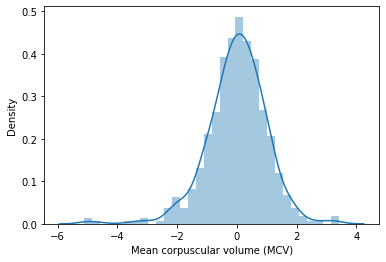

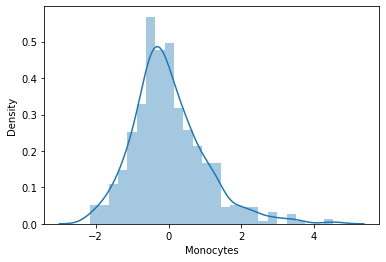

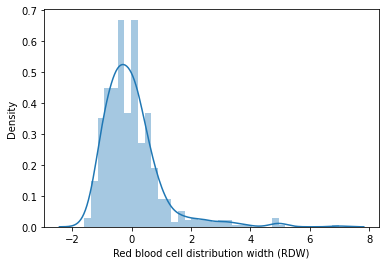

In [250]:
for col in blood_test:
    plt.figure()
    sns.distplot(covid19[col])

# Comparaison des tests viraux entre atteints du corona ou non:

In [251]:
#Afficher les modalités de ces valeurs
for col in virus_test:
    print(f'{col:-<50}', covid19[col].unique())

Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus229E----------------------------------- [nan 'not_detected' 'detected']
Coro

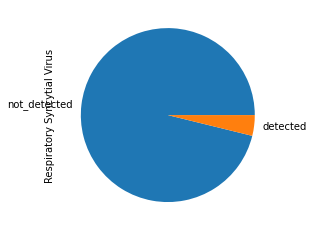

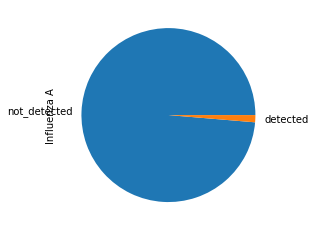

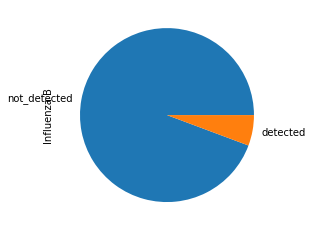

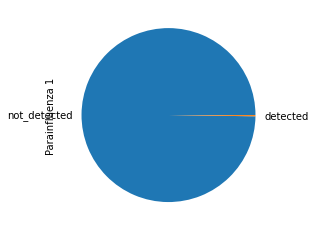

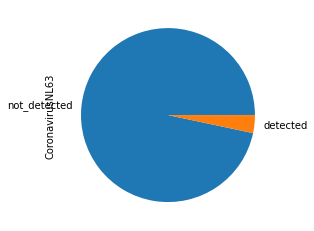

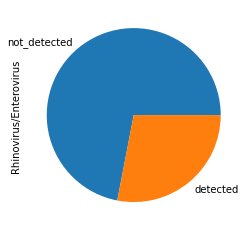

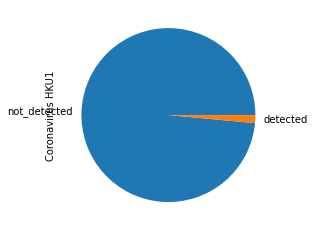

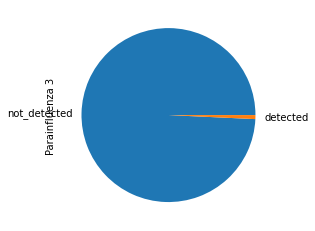

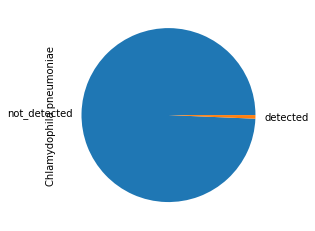

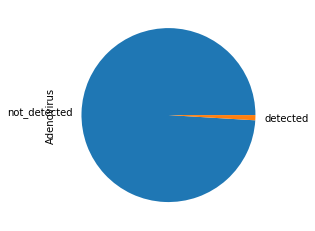

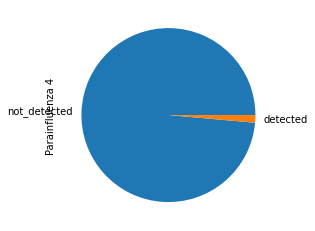

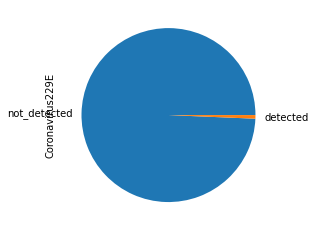

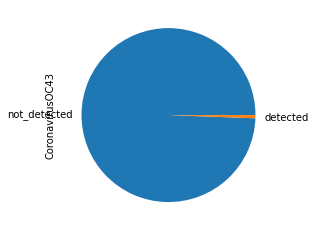

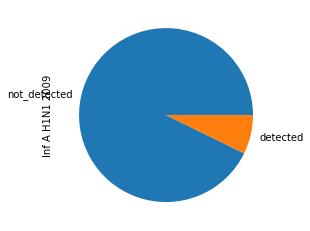

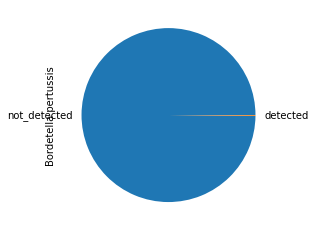

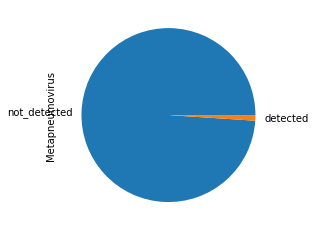

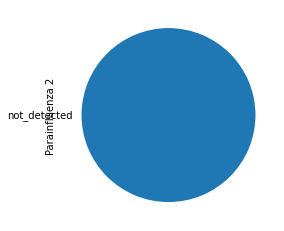

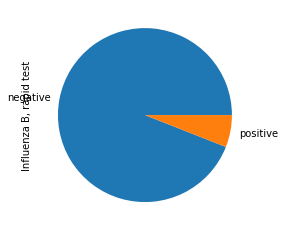

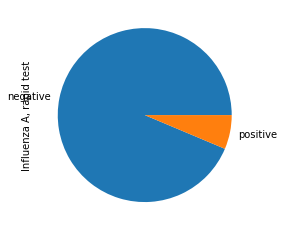

In [252]:
for col in virus_test:
    plt.figure()
    covid19[col].value_counts().plot.pie()

# Patient Age quantile

C:\Users\elbakkali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Patient age quantile', ylabel='Density'>

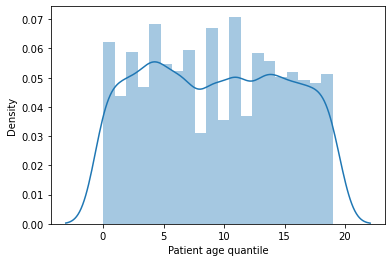

In [253]:
sns.distplot(covid19['Patient age quantile'], bins=20)

In [254]:
covid19['Patient age quantile'].value_counts().sort_index()

0     334
1     234
2     315
3     251
4     366
5     294
6     281
7     319
8     167
9     359
10    190
11    380
12    197
13    313
14    299
15    269
16    279
17    263
18    259
19    275
Name: Patient age quantile, dtype: int64

# Relation Variables/target**

# Blood/target**:

In [255]:
positive = covid19[covid19['SARS-Cov-2 exam result'] == 'positive']

In [256]:
negative = covid19[covid19['SARS-Cov-2 exam result'] == 'negative']

In [257]:
negative_558 = negative.sample(n=558)

C:\Users\elbakkali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\elbakkali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\elbakkali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

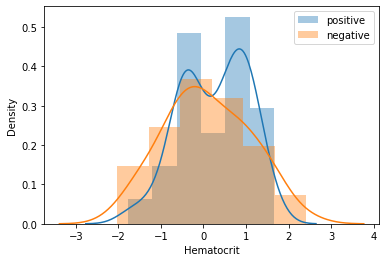

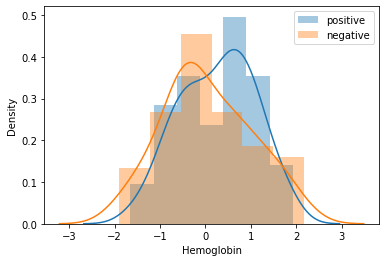

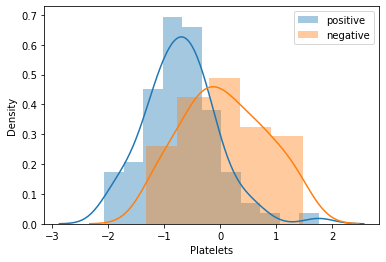

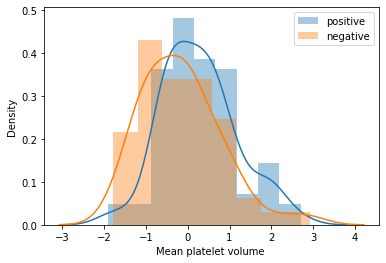

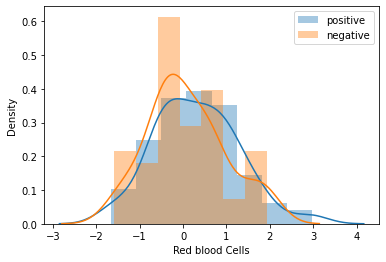

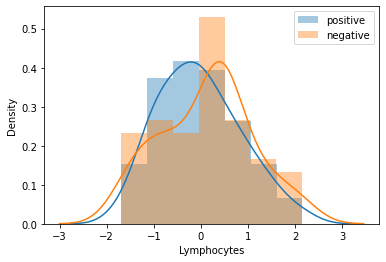

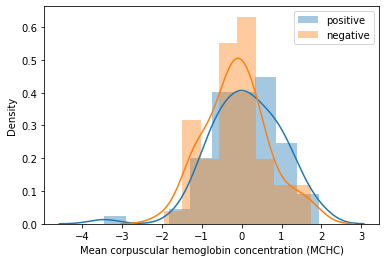

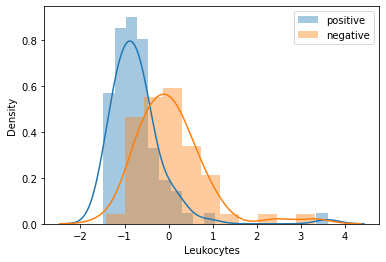

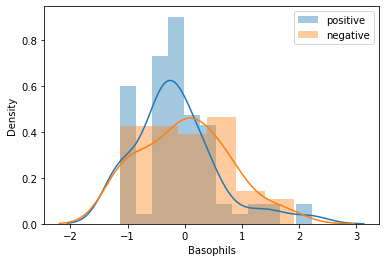

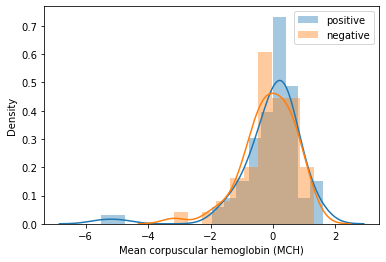

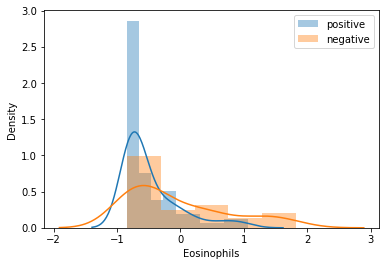

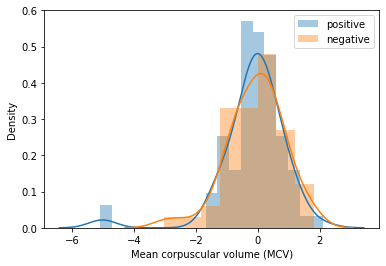

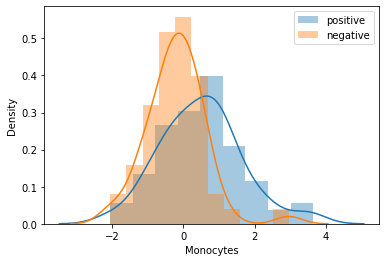

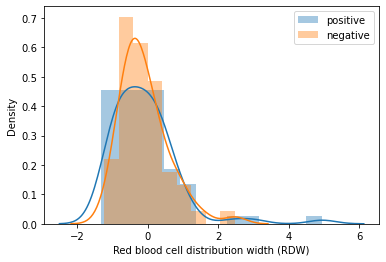

In [258]:
for col in blood_test:
    plt.figure()
    sns.distplot(positive[col], label='positive')
    sns.distplot(negative_558[col], label='negative')
    plt.legend()

# Age / target **

C:\Users\elbakkali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\elbakkali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


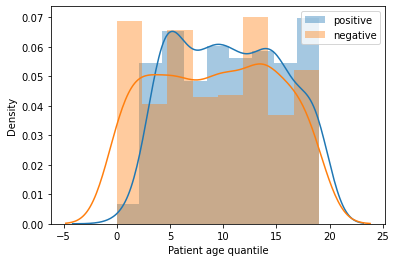

In [259]:
plt.figure()
sns.distplot(positive['Patient age quantile'], label='positive')
sns.distplot(negative_558['Patient age quantile'], label='negative')
plt.legend()

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

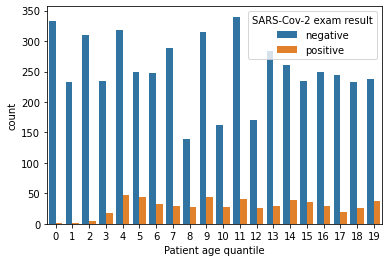

In [260]:
sns.countplot(x='Patient age quantile', hue= 'SARS-Cov-2 exam result', data=covid19)

# Relation viral/target**:

In [261]:
pd.crosstab(covid19['SARS-Cov-2 exam result'], covid19['Rhinovirus/Enterovirus'])

Rhinovirus/Enterovirus  detected  not_detected
SARS-Cov-2 exam result                        
negative                     373           867
positive                       6           106

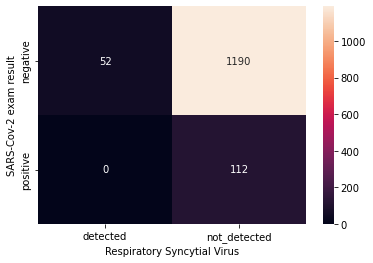

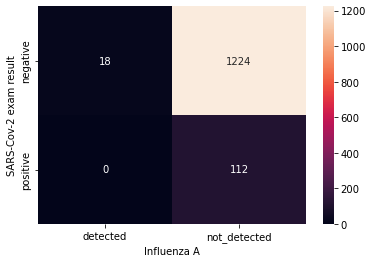

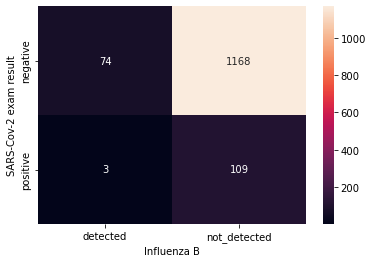

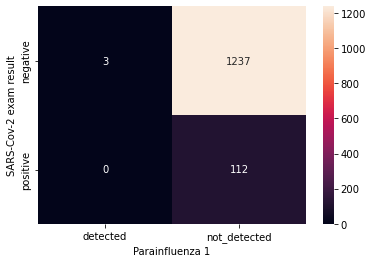

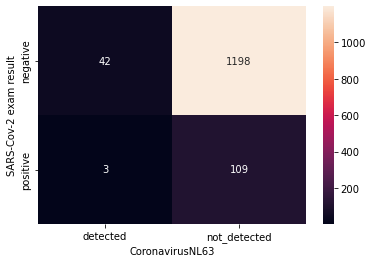

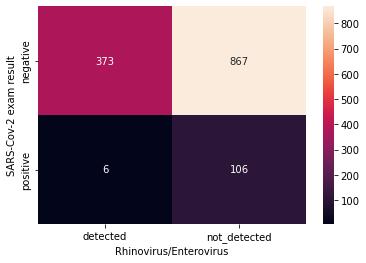

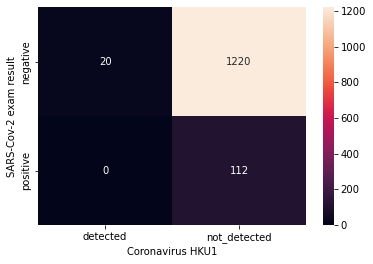

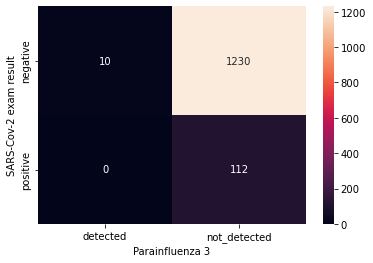

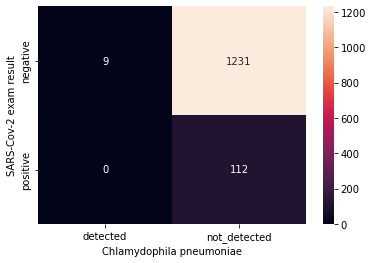

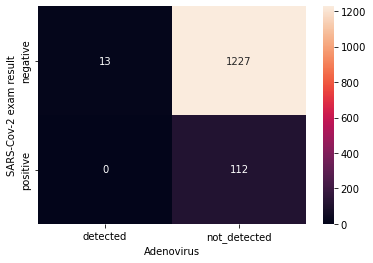

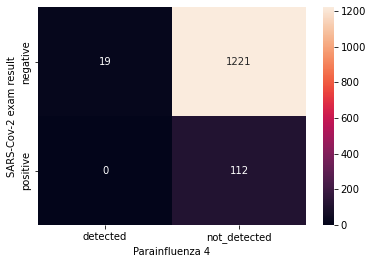

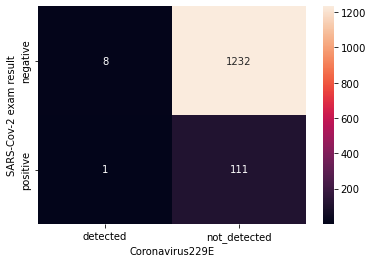

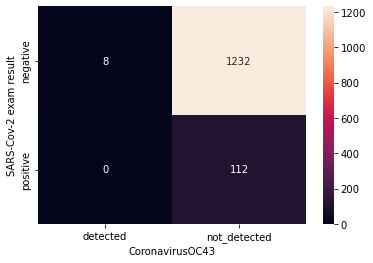

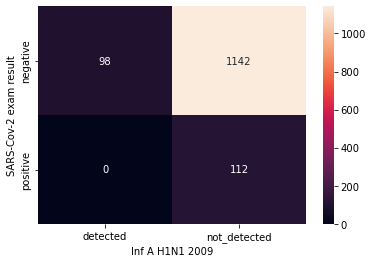

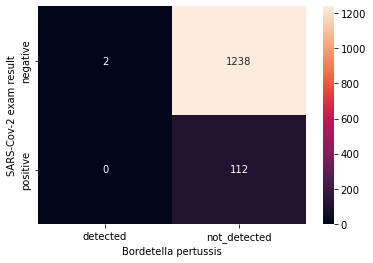

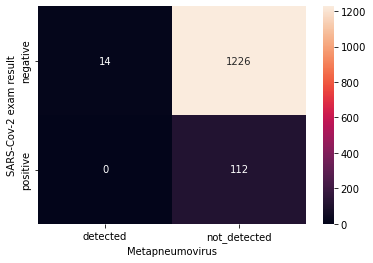

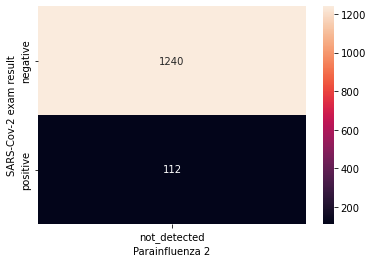

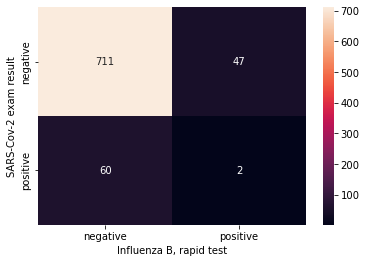

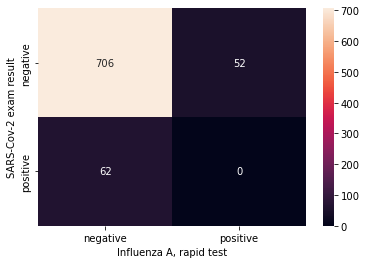

In [262]:
for col in virus_test:
    plt.figure()
    sns.heatmap(pd.crosstab(covid19['SARS-Cov-2 exam result'] , covid19[col]), annot=True , fmt='d')

# Analyse plus détaillée:

### - Relation Variable/Variable:
    
    - Blood data / Blood data
    - Blood data / age
    - viral / viral
    - relation maladie / blood data
    - relation hospitalisation / est malade
    - relation hospitalisation / blood

# Blood / Blood:

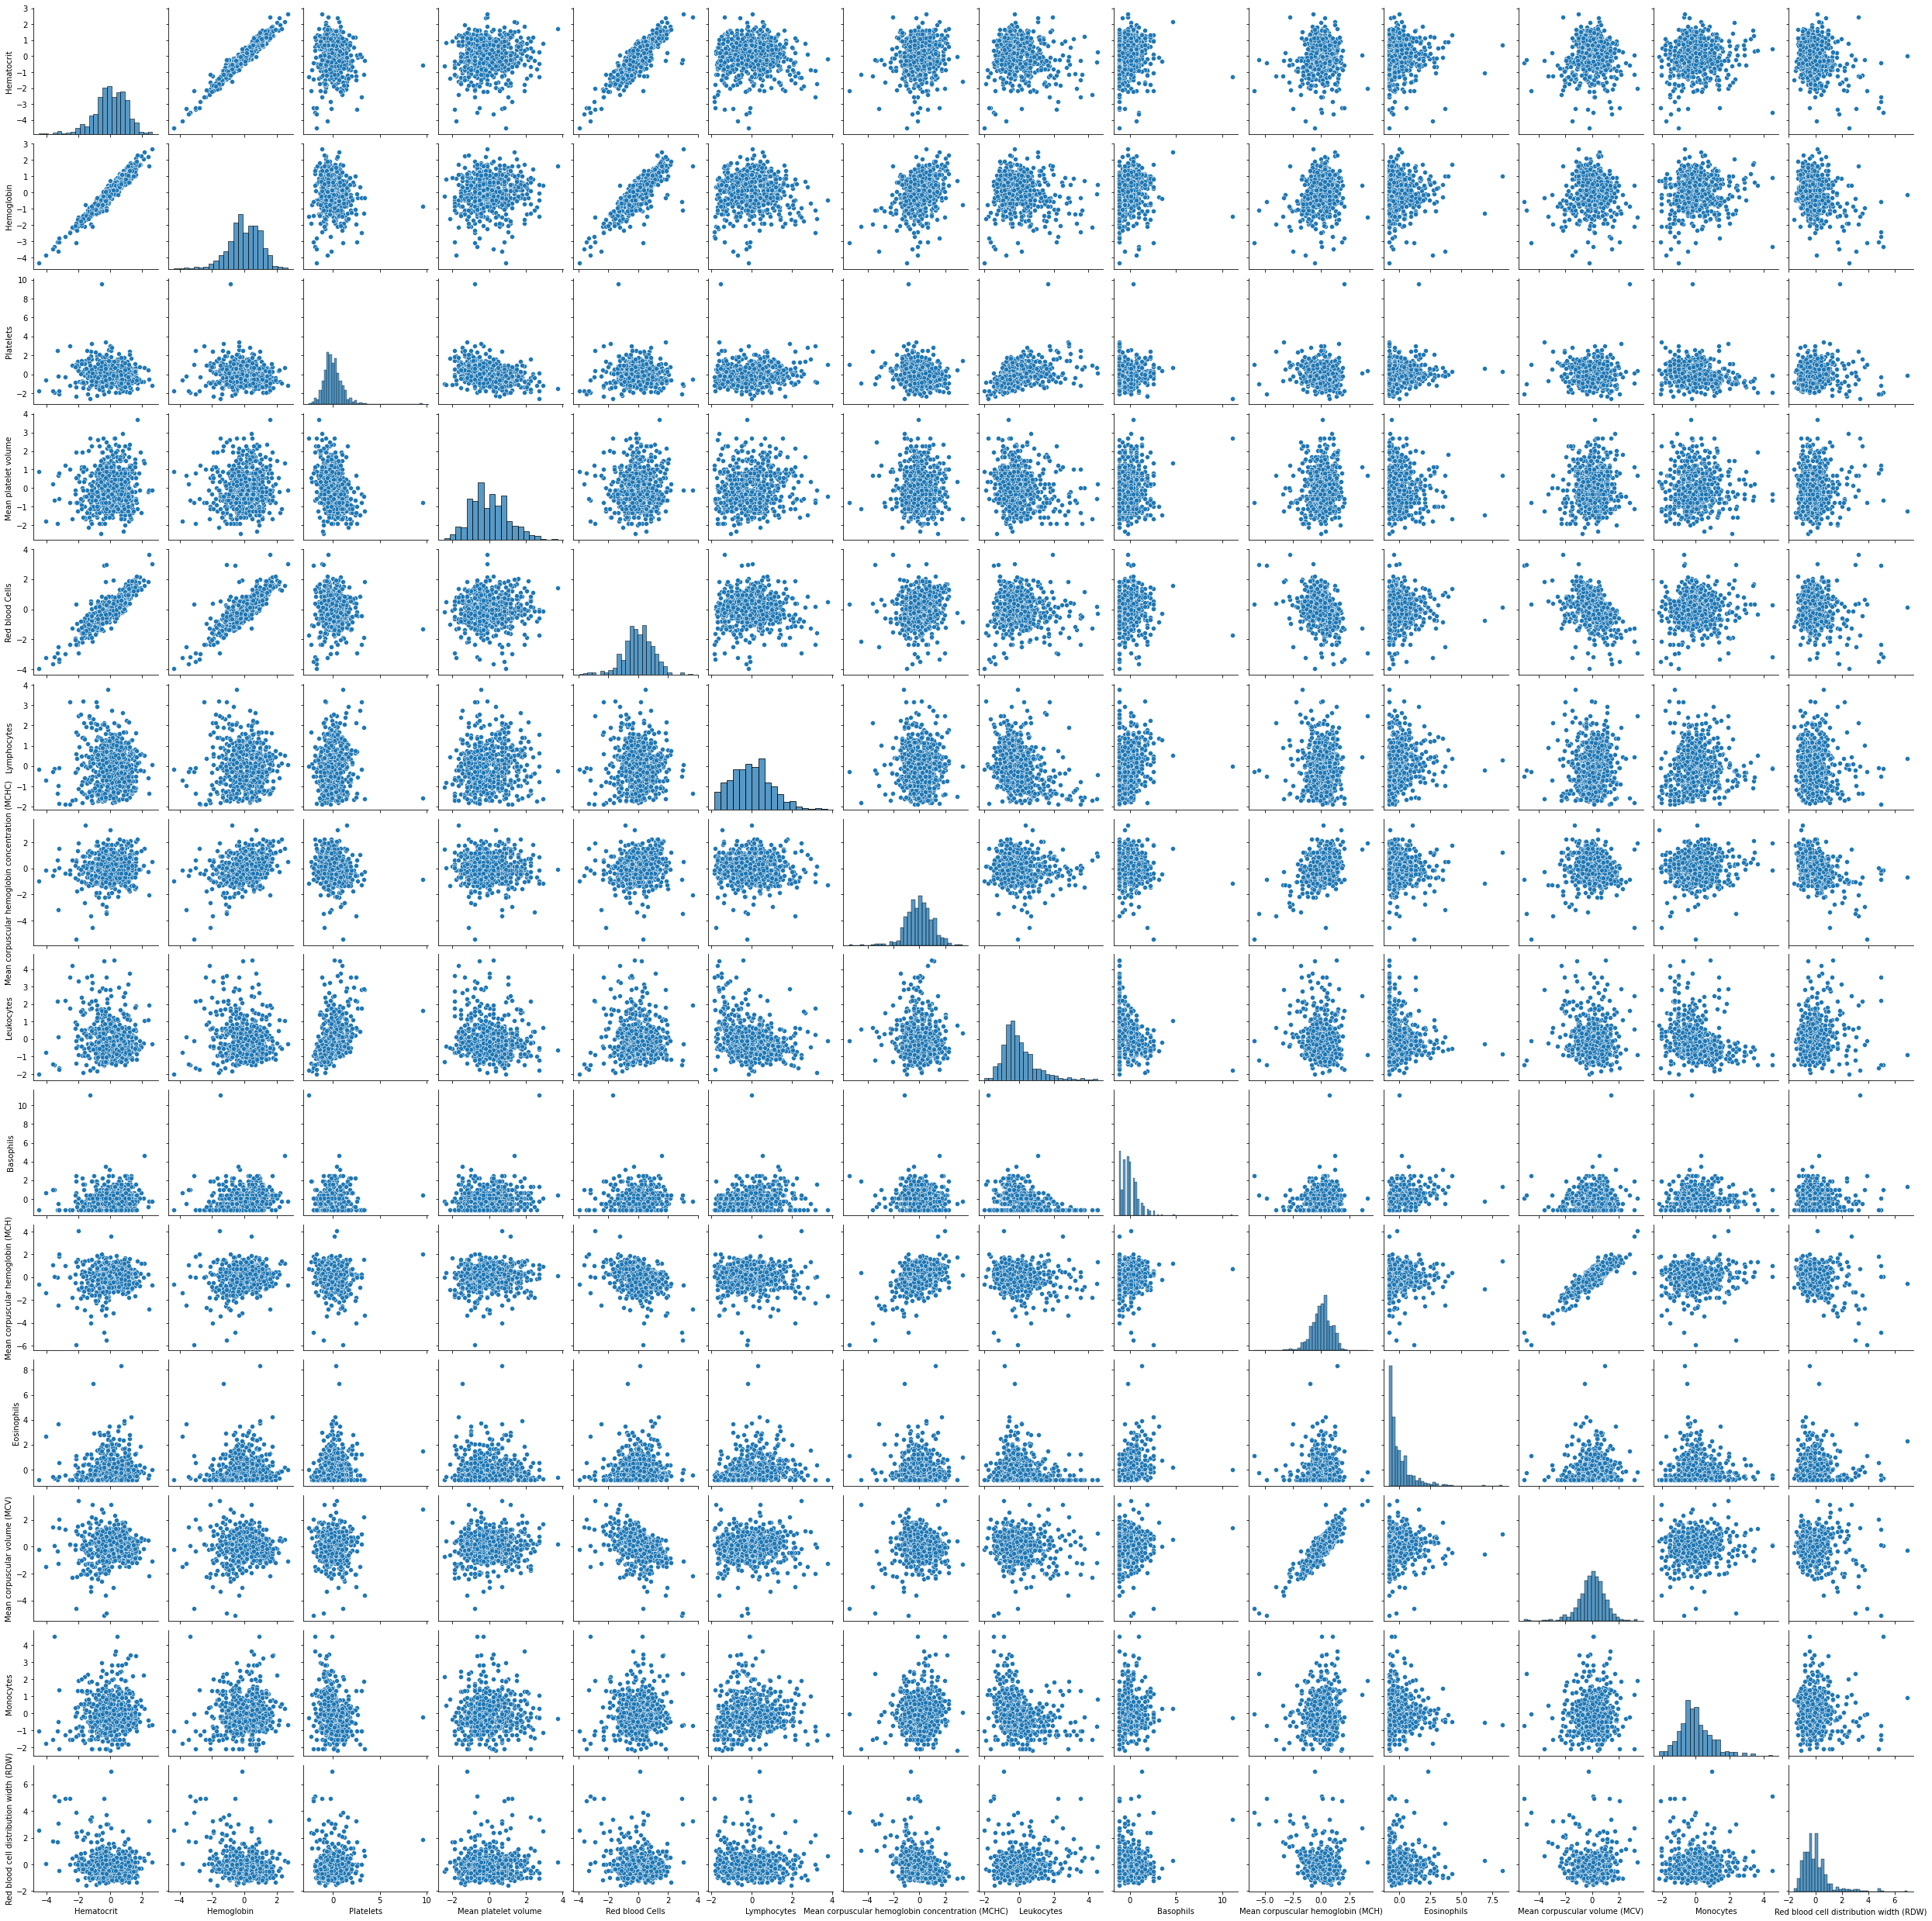

In [263]:
sns.pairplot(covid19[blood_test])

<AxesSubplot:>

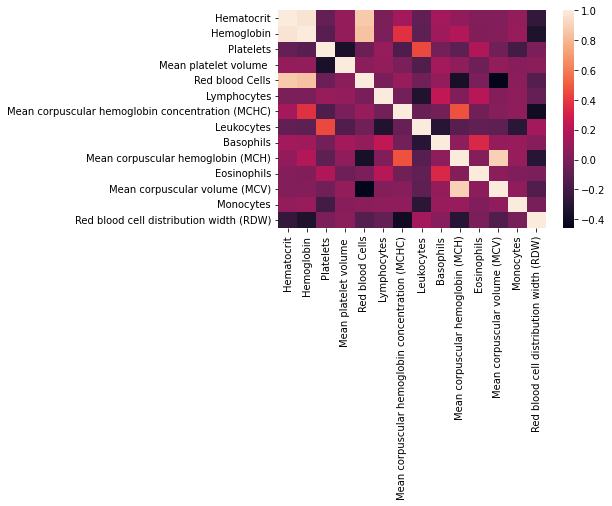

In [264]:
sns.heatmap(covid19[blood_test].corr())

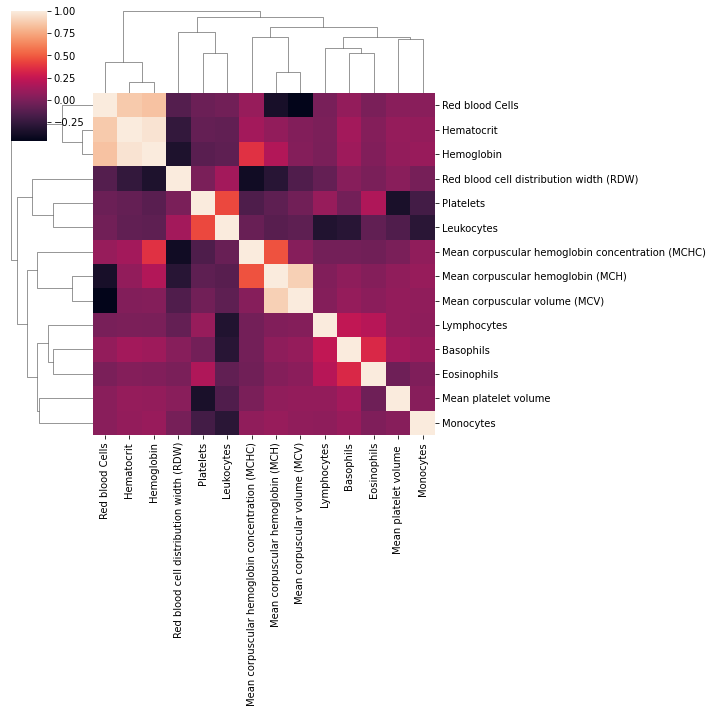

In [265]:
sns.clustermap(covid19[blood_test].corr())

# Blood/ Age:

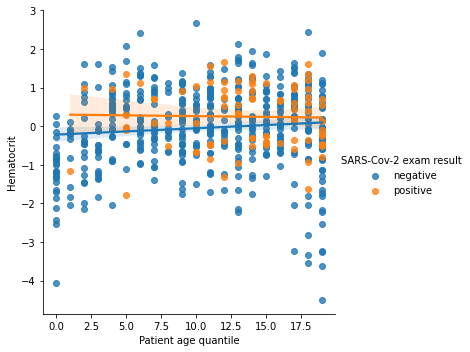

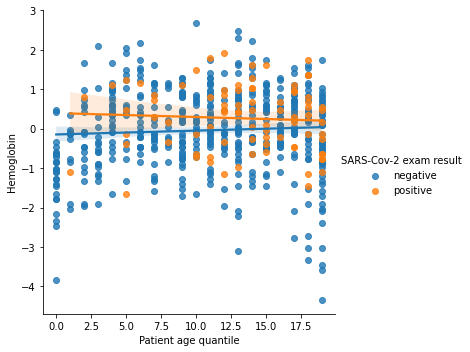

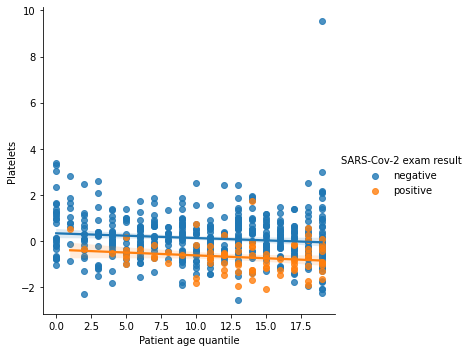

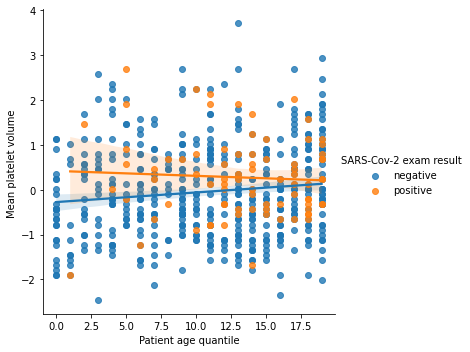

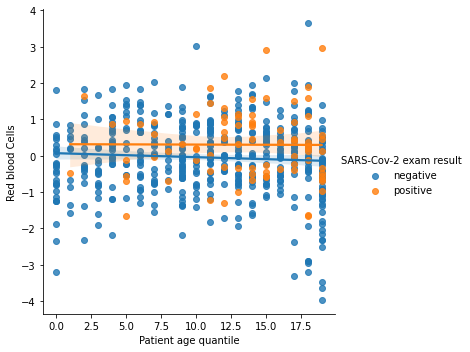

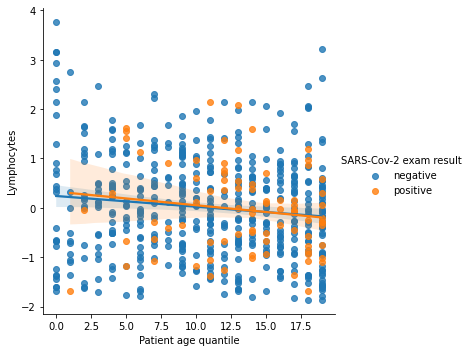

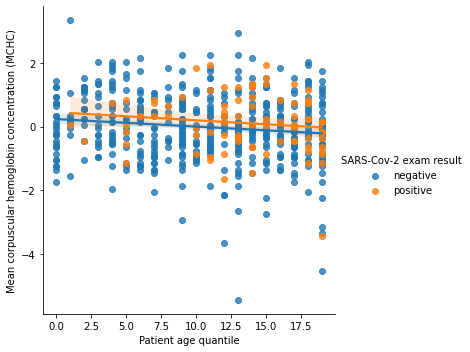

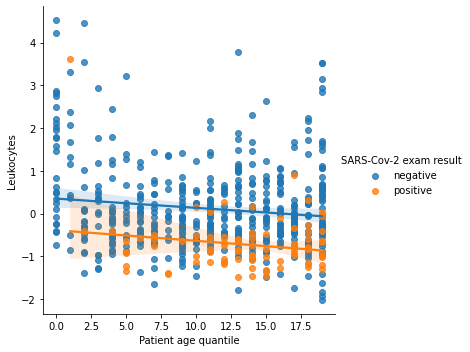

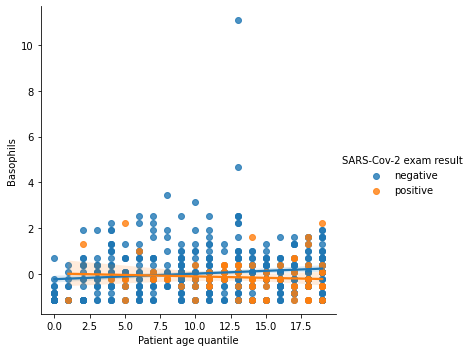

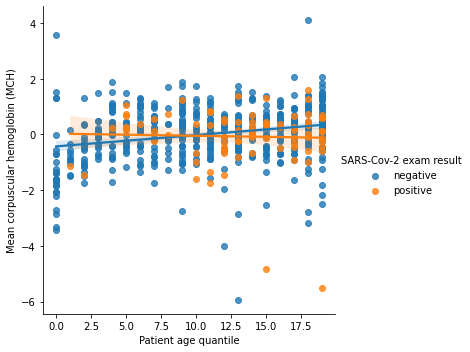

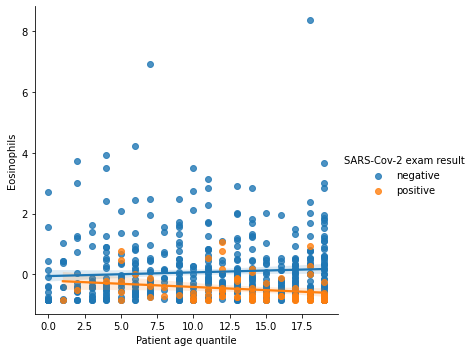

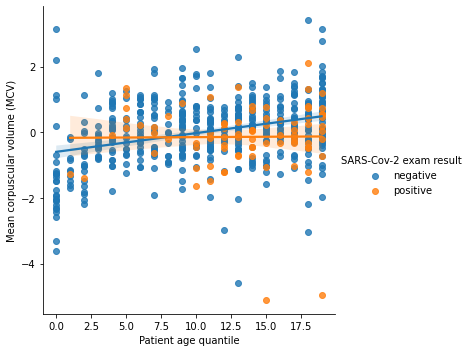

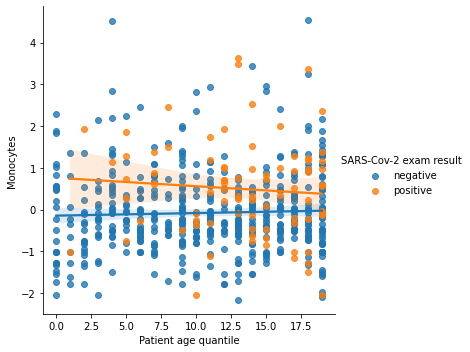

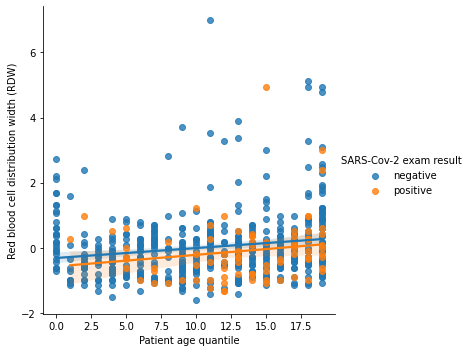

In [266]:
for col in blood_test:
    sns.lmplot(x='Patient age quantile', y=col, data= covid19, hue = 'SARS-Cov-2 exam result' )

# Viral/Viral: 

In [267]:
pd.crosstab(covid19['Influenza A'], covid19['Influenza A, rapid test']) #Rapid test peu fiable dans la détection de Influenza

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [268]:
pd.crosstab(covid19['Influenza A'], covid19['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

# Est malade/blood:

In [273]:
covid19['est_malade'] = np.sum(covid19[virus_test[:-2]] == 'detected', axis=1)

<AxesSubplot:>

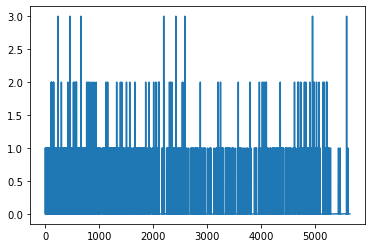

In [275]:
covid19['est_malade'].plot()

In [283]:
est_malade = covid19[covid19['est_malade']>0]
non_malade = covid19[covid19['est_malade']==0]

C:\Users\elbakkali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\elbakkali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\elbakkali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

C:\Users\elbakkali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


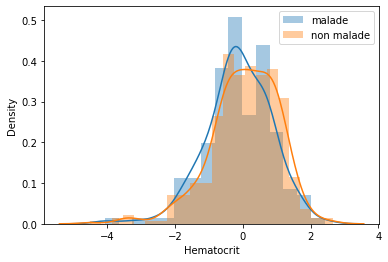

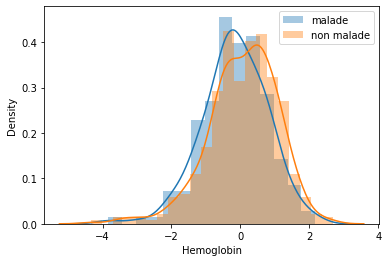

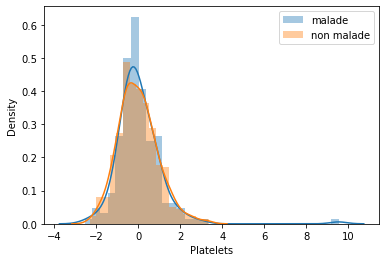

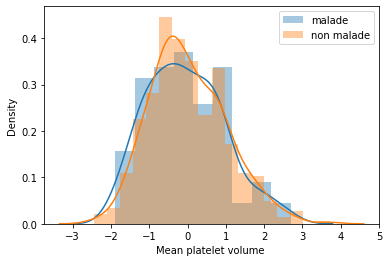

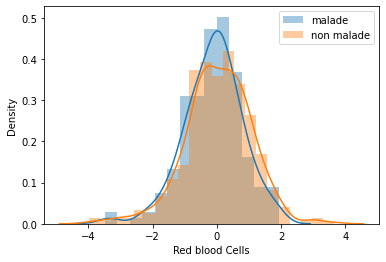

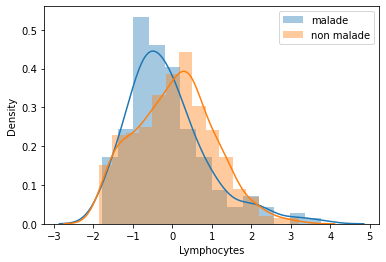

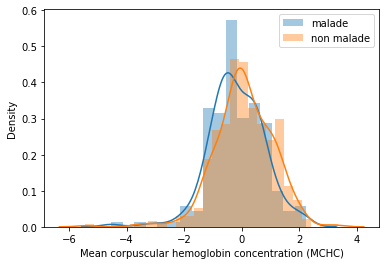

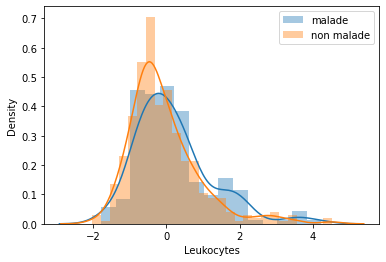

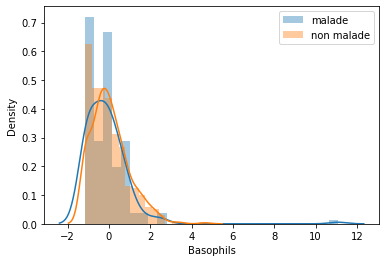

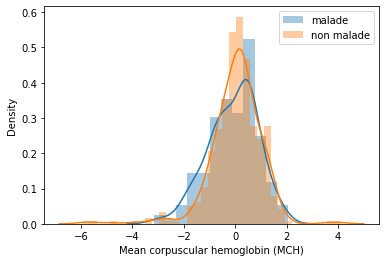

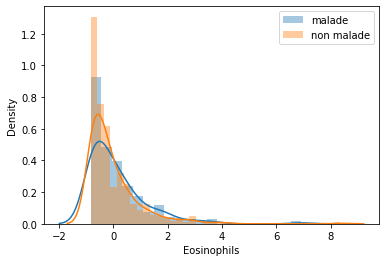

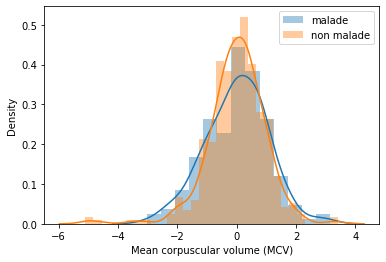

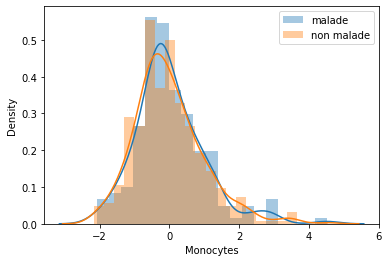

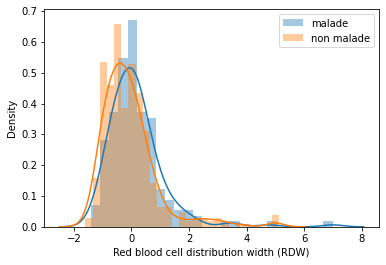

In [285]:
for col in blood_test:
    plt.figure()
    sns.distplot(est_malade[col], label='malade')
    sns.distplot(non_malade[col], label='non malade')
    plt.legend()

# Relation Hospitalisation/Blood:

In [288]:
def hospitalisation(covid19):
    if covid19['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'surveillance'
    elif covid19['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'soins semi-intensifs'
    elif covid19['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'soins intensifs'
    else:
        return 'inconnu'

In [290]:
covid19['type de soins'] = covid19.apply(hospitalisation, axis=1)

In [292]:
covid19['type de soins'].value_counts()

inconnu                 5474
surveillance              79
soins semi-intensifs      50
soins intensifs           41
Name: type de soins, dtype: int64

C:\Users\elbakkali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\elbakkali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\elbakkali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

C:\Users\elbakkali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\elbakkali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\elbakkali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

C:\Users\elbakkali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\elbakkali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\elbakkali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

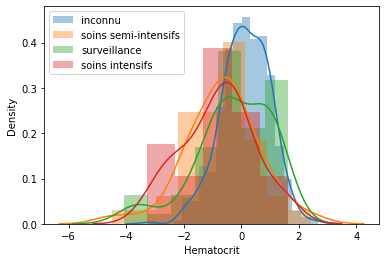

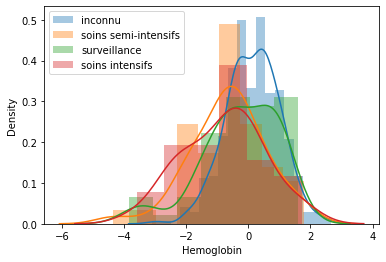

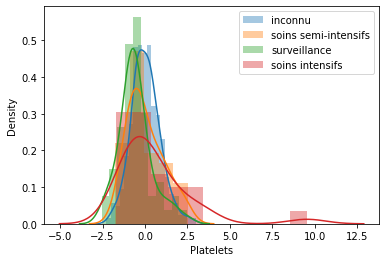

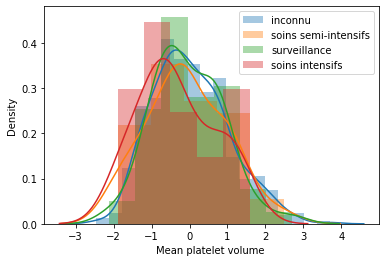

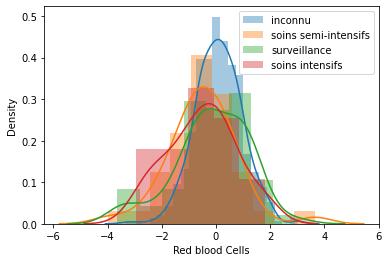

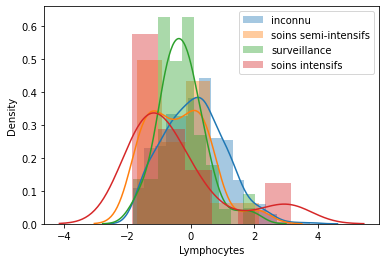

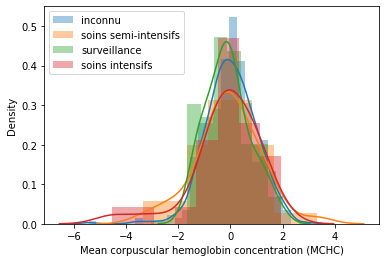

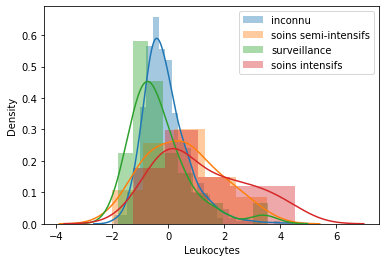

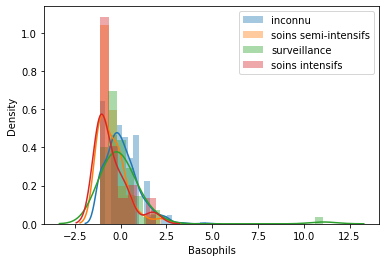

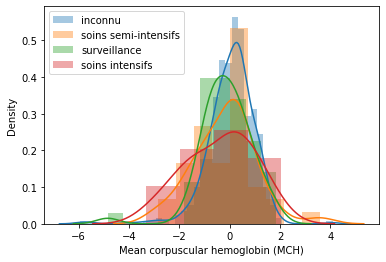

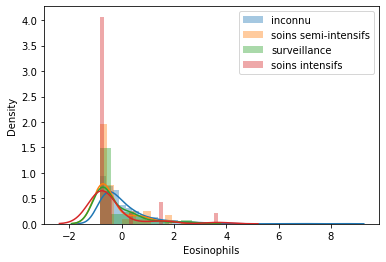

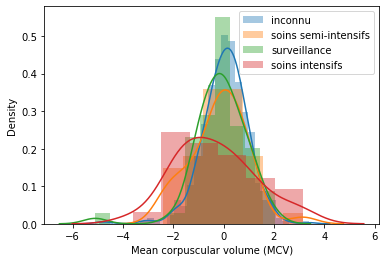

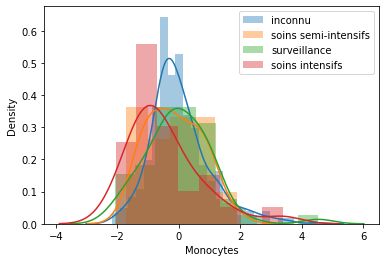

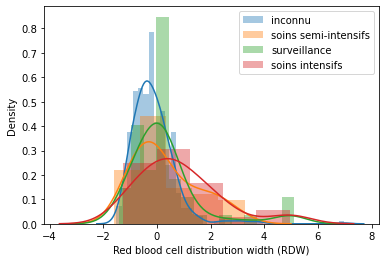

In [305]:
for col in blood_test:
    plt.figure()
    for soins in covid19['type de soins'].unique():
        sns.distplot(covid19[col][covid19['type de soins']== soins], label=soins)
        plt.legend()

In [306]:
covid19.head(5)

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN             

# Relation hospitalisation/virus:

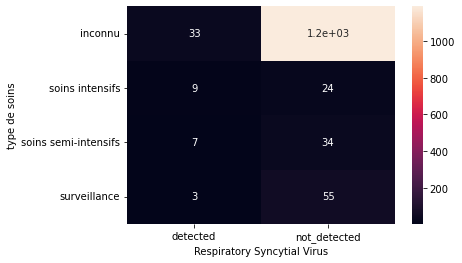

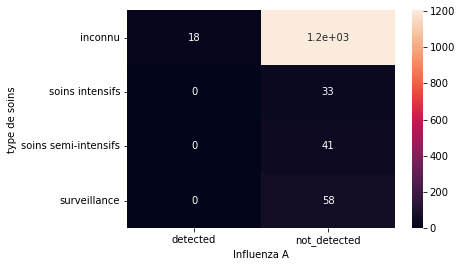

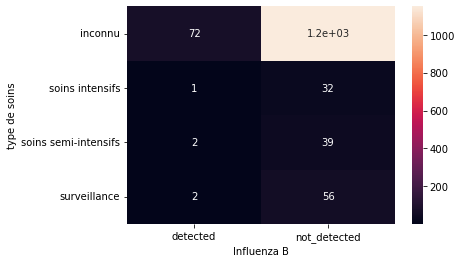

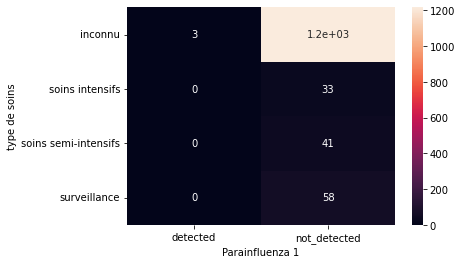

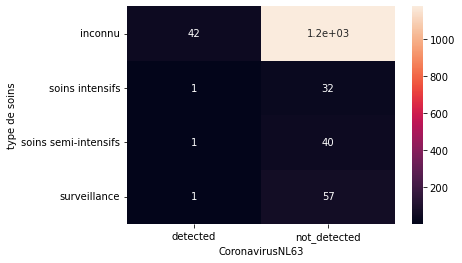

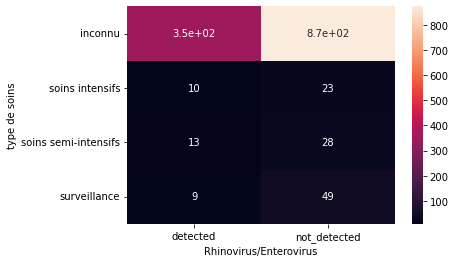

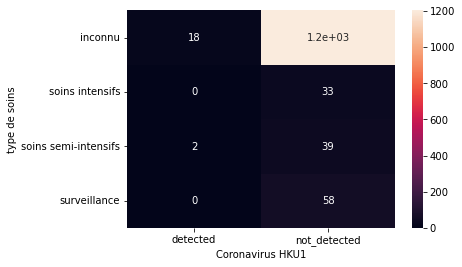

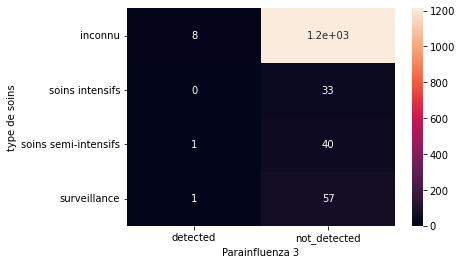

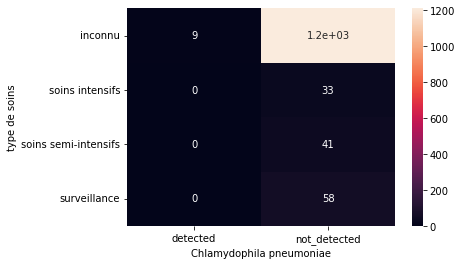

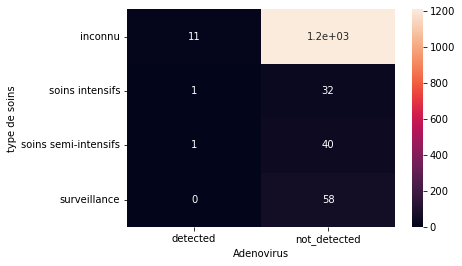

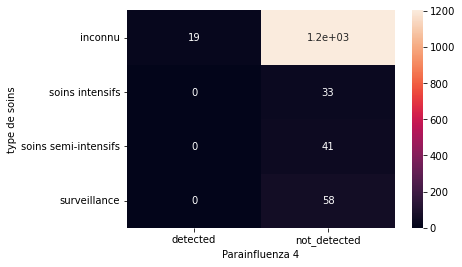

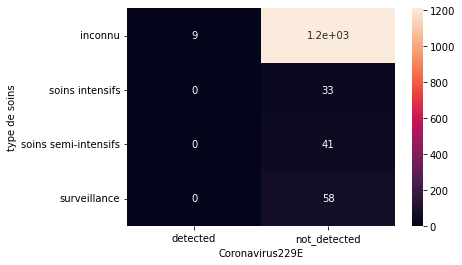

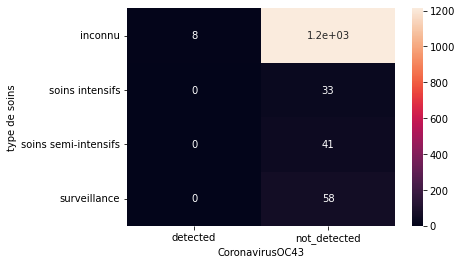

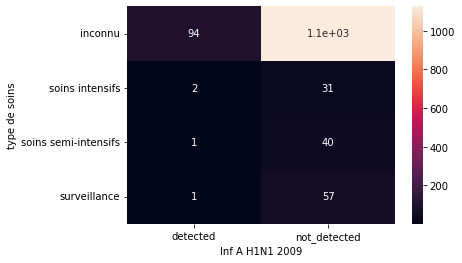

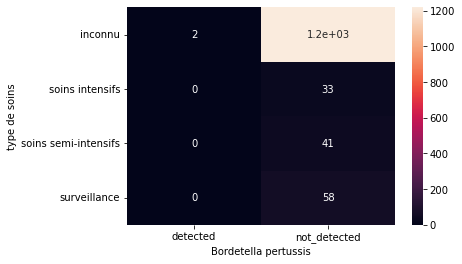

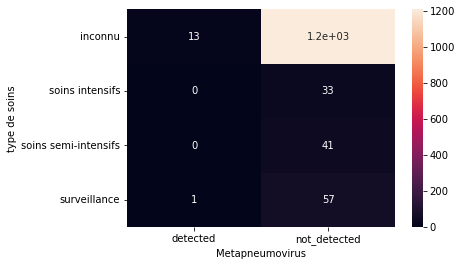

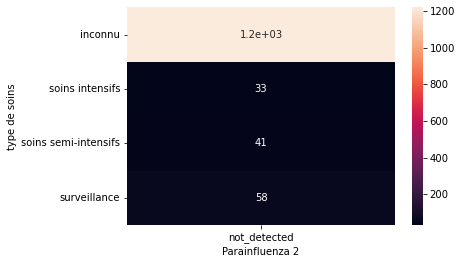

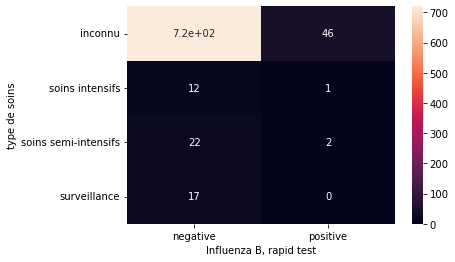

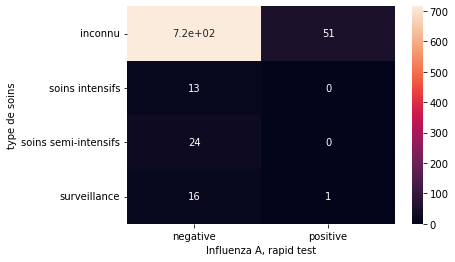

In [322]:
for col in virus_test:
    plt.figure()
    sns.heatmap(pd.crosstab(covid19['type de soins'], covid19[col]), annot=True)

In [333]:
df = covid19.copy()

In [334]:
df.count()

Patient ID                                               5644
Patient age quantile                                     5644
SARS-Cov-2 exam result                                   5644
Patient addmited to regular ward (1=yes, 0=no)           5644
Patient addmited to semi-intensive unit (1=yes, 0=no)    5644
Patient addmited to intensive care unit (1=yes, 0=no)    5644
Hematocrit                                                603
Hemoglobin                                                603
Platelets                                                 602
Mean platelet volume                                      599
Red blood Cells                                           602
Lymphocytes                                               602
Mean corpuscular hemoglobin concentration (MCHC)          602
Leukocytes                                                602
Basophils                                                 602
Mean corpuscular hemoglobin (MCH)                         602
Eosinoph

In [353]:
df1 = df[virus_test[:-2]]
df1['covid'] = df['SARS-Cov-2 exam result']

df1.dropna()['covid'].value_counts(normalize=True)

C:\Users\ELBAKK~1\AppData\Local\Temp/ipykernel_4368/1423424258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['covid'] = df['SARS-Cov-2 exam result']


negative    0.91716
positive    0.08284
Name: covid, dtype: float64

In [342]:
df_sang = df[blood_test]
df_sang['covid'] = df['SARS-Cov-2 exam result']

df_sang.dropna()['covid'].value_counts(normalize=True)

C:\Users\ELBAKK~1\AppData\Local\Temp/ipykernel_4368/3053263514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sang['covid'] = df['SARS-Cov-2 exam result']


negative    0.864548
positive    0.135452
Name: covid, dtype: float64

# Test de Student:

In [355]:
from scipy.stats import ttest_ind

In [356]:
def test_student(col):
    alpha = 0.02
    stats , p = ttest_ind(positive[col].dropna(), negative_558[col].dropna())
    if p < alpha:
        return 'H0 rejetée'
    else:
        return 'H0'

In [358]:
for col in blood_test:
    print(f'{col:-<60}',test_student(col))

Hematocrit-------------------------------------------------- H0
Hemoglobin-------------------------------------------------- H0
Platelets--------------------------------------------------- H0 rejetée
Mean platelet volume --------------------------------------- H0 rejetée
Red blood Cells--------------------------------------------- H0
Lymphocytes------------------------------------------------- H0
Mean corpuscular hemoglobin concentration (MCHC)------------ H0
Leukocytes-------------------------------------------------- H0 rejetée
Basophils--------------------------------------------------- H0
Mean corpuscular hemoglobin (MCH)--------------------------- H0
Eosinophils------------------------------------------------- H0 rejetée
Mean corpuscular volume (MCV)------------------------------- H0
Monocytes--------------------------------------------------- H0 rejetée
Red blood cell distribution width (RDW)--------------------- H0


In [359]:
from scipy.stats import chi2_contingency

In [397]:
malade = covid19[covid19['est_malade']>0]
sain = covid19[covid19['est_malade']==0]

In [404]:
print(malade.shape)
print(sain_692.shape)

(692, 41)
(692, 41)


In [403]:
sain_692 = sain.sample(len(malade))

In [405]:
def st_test(col):
    alpha = 0.05
    stats , p = ttest_ind(malade[col].dropna(), sain_692[col].dropna())
    if p < alpha:
        return 'H0 rejetée'
    else:
        return 'H0'

In [407]:
for col in blood_test:
    print(f'{col:-<60}', st_test(col))

Hematocrit-------------------------------------------------- H0
Hemoglobin-------------------------------------------------- H0
Platelets--------------------------------------------------- H0
Mean platelet volume --------------------------------------- H0
Red blood Cells--------------------------------------------- H0
Lymphocytes------------------------------------------------- H0
Mean corpuscular hemoglobin concentration (MCHC)------------ H0
Leukocytes-------------------------------------------------- H0
Basophils--------------------------------------------------- H0
Mean corpuscular hemoglobin (MCH)--------------------------- H0
Eosinophils------------------------------------------------- H0 rejetée
Mean corpuscular volume (MCV)------------------------------- H0
Monocytes--------------------------------------------------- H0
Red blood cell distribution width (RDW)--------------------- H0


# Pre-processing:

In [409]:
df_pp = pd.read_excel(r'C:\Users\elbakkali\Desktop\Datasets_Machine_Learning\covid19.xlsx')

In [430]:
df_pp.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

In [413]:
pd.set_option('display.max_row', 114)
pd.set_option('display.max_column', 114)

In [418]:
msr = (df_pp.isna().sum()/df_pp.shape[0]).sort_values() #missing rate

In [426]:
blood_columns = df_pp.columns[(msr > 0.75) & (msr < 0.86)]
virus_columns = df_pp.columns[(msr > 0.89) & (msr < 0.90)]

In [432]:
important_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [434]:
df_pp = df_pp[important_columns + blood_columns + virus_columns]
df.head()

ValueError: operands could not be broadcast together with shapes (2,) (19,) 